# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table", class_ = 'table')
rows = table.find_all(class_ = "data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_list = []
# Loop through the scraped data to create a list of rows
for row in rows:
    #extract text only from each element of each row
    row_data = [data.text.strip() for data in row.find_all("td")] 
    row_list.append(row_data)

print(row_list)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

mars_temp_df = pd.DataFrame(row_list, columns = column_names)

In [8]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
#integers and floats
mars_temp_df = mars_temp_df.astype({"sol": 'int', 
                                    'ls': 'int',
                                    'month': 'int',
                                    'min_temp': 'float',
                                    'pressure': 'float'
                                    })
#date
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])



In [11]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
highest_month = mars_temp_df['month'].max()
print(f'There are {highest_month} months on Mars.')

#number of data points for each month
mars_temp_df.groupby('month')['id'].count()

There are 12 months on Mars.


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
datapoints = len(mars_temp_df['sol'])

print(f"There are {datapoints} days worth of data collected.")

There are 1867 days worth of data collected.


In [14]:
# 3. What is the average low temperature by month?
low_temp_df = mars_temp_df.groupby('month')['min_temp'].mean()
low_temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

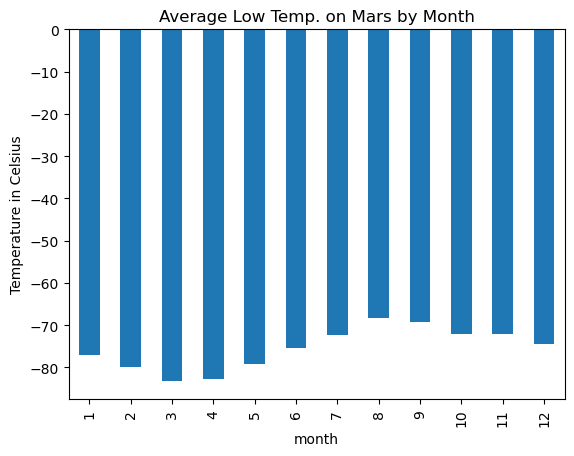

In [15]:
# Plot the average temperature by month
low_temp_df.plot(kind = 'bar', title = "Average Low Temp. on Mars by Month", 
                 xlabel = 'month',
                   ylabel= 'Temperature in Celsius')

plt.show()

The coldest avg temp is in month 3.
The hottest avg temp is in month 8.


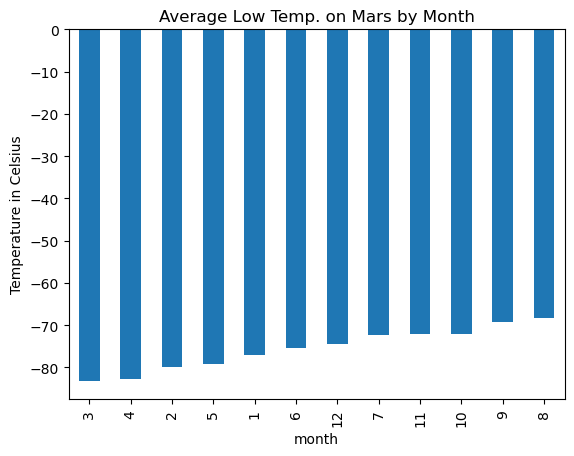

In [16]:
# Identify the coldest and hottest months in Curiosity's location
print(f'The coldest avg temp is in month {low_temp_df.idxmin()}.')
print(f'The hottest avg temp is in month {low_temp_df.idxmax()}.')

#sort from low to high to plot
low_temp_df_sorted = low_temp_df.sort_values()

low_temp_df_sorted.plot(kind = 'bar', title = "Average Low Temp. on Mars by Month", 
                 xlabel = 'month',
                   ylabel= 'Temperature in Celsius')

plt.show()

In [17]:
# 4. Average pressure by Martian month
pressure_df = mars_temp_df.groupby('month')['pressure'].mean()
pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

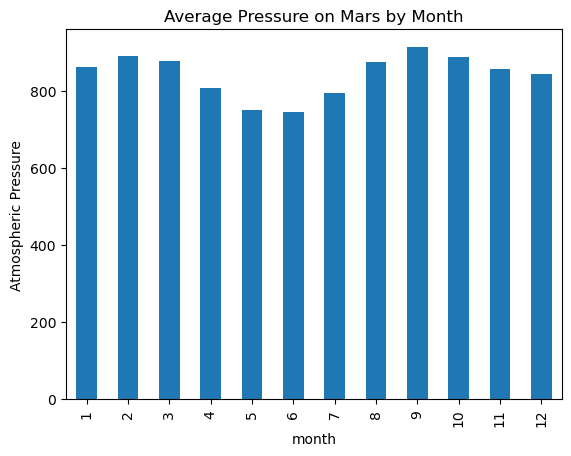

In [18]:
# Plot the average pressure by month
pressure_df.plot(kind = 'bar', title = "Average Pressure on Mars by Month", 
                 xlabel = 'month',
                   ylabel= 'Atmospheric Pressure')

plt.show()

<Axes: title={'center': 'Daily Minimum Temperautre on Mars'}, xlabel='Number of terrestrial days', ylabel='Minium Temperature'>

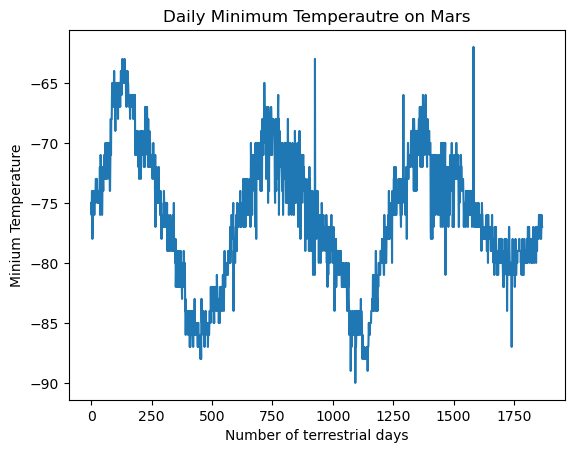

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_temp_df['min_temp'].plot(kind = 'line',
                              title = 'Daily Minimum Temperautre on Mars',
                              xlabel= 'Number of terrestrial days',
                              ylabel= 'Minium Temperature')



The figure labeled "Daily Minimium Temperature on Mars" can be used to estimate the average number of Earth Days that it takes for Mars to revolve around the sun, or one Martian year. The distance between points where the minimum daily temperature is at it's lowest is about 1100-450 or 650 days, suggesting that year on Mars is around 650 days, almost double a year on earth!

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
mars_temp_df.to_csv("mars_temp_df.csv", index = True)

In [21]:
browser.quit()